<br>

<br>

# Stanford Open Policing Project

<br>

Hello everyone ! 

In this notebook, we are going to do an exploratory data analysis.

Let's start with importing the libraries we might need.



<br>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

<br>

After importing the libraries next step is reading the file.

<br>

In [2]:
df = pd.read_csv("police_project.csv")

<br>
To make an efficient analysis, It is very crucial to get familiar with the dataset.
<br> <br>

In [3]:
df.shape

(91741, 15)

<br>
I personally prefer to get a sample randomly from the dataset instead of getting some data from the top so I can see if there is something strange.
<br><br>

In [4]:
df.sample(5)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
78755,2014-07-01,00:01,NaN,M,1991.0,23.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
37384,2009-09-17,22:18,NaN,M,1957.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False
36534,2009-08-02,14:45,NaN,M,1941.0,68.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
45583,2010-10-18,12:09,NaN,M,1977.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
63681,2012-09-13,15:05,NaN,M,1965.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

<br>
There are some info about the dataset right above. <br><br>

- According to that we have some columns which consist of null values in and some columns which almost don't have any non-null value in. It would be benefical to get rid of those columns when we start cleaning out data.
<br><br>
- Also another thing that draw my attention is there are some columns includes date-time but their data type is object which doesn't help and some columns which have numeric values but their data type are object too. 
<br><br>

I always make a 'To Do List' before start cleaning the data. Thus I do not forget or skip any step during cleaning.

- I am going to explore every column one by one to make sure there is nothing important that I do not notice. 
<br>

- Then as a next step with the results I will make my 'To Do List'.
<br>
- One more thing I would like to share is, it is very important that not working on your actual dataset to prevent undesirable incidents. Always get a copy of you dataset and work on it.

In [6]:
df1 = df.copy()

In [7]:
df1.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [8]:
df1.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

- As you can see, county_name column do not have any non-null value and also the search_type column almost consists of null values.

## To Do List

1. Change the dtype of stop_date and stop_time columns.
2. Drop the column county_name.
3. Driver_age_raw and Driver_age columns are the same, only one of them has more missing value. We can drop one of them.
4. It is the same for violation_raw and violation column. Better to drop one of them.
5. Search_type columns has so many missing values, we can drop it as weel.
6. is_arrested column better to be bool.

Since we have specified the steps we are going to do for the purpose of cleaning the dataset we can get going.

<br>

## *Data Cleaning*

<br>

### Stop_date - Stop_time

In [9]:
df1['stop_date'] = pd.to_datetime(df1.stop_date)

In [10]:
df1.stop_date

0       2005-01-02
1       2005-01-18
2       2005-01-23
3       2005-02-20
4       2005-03-14
           ...    
91736   2015-12-31
91737   2015-12-31
91738   2015-12-31
91739   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 91741, dtype: datetime64[ns]

In [11]:
df1['stop_time'] = pd.to_datetime(df1['stop_time'], format='%H:%M').dt.hour

In [12]:
df1.stop_time

0         1
1         8
2        23
3        17
4        10
         ..
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_time, Length: 91741, dtype: int64

<br>

### County_name

In [13]:
df1.drop('county_name',axis = 1, inplace = True)

In [14]:
df1.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

<br>

### Driver_age_raw - Driver_age

In [15]:
df1.driver_age.isnull().sum()

5621

In [16]:
df1.driver_age_raw.isnull().sum()

5327

In [17]:
df1.stop_date.sort_values()

0       2005-01-02
1       2005-01-18
2       2005-01-23
3       2005-02-20
4       2005-03-14
           ...    
91718   2015-12-31
91717   2015-12-31
91739   2015-12-31
91727   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 91741, dtype: datetime64[ns]

In [18]:
df1[(df1.driver_age_raw.notnull())& (df1.driver_age.isnull())][['stop_date','driver_age_raw', 'driver_age']]

,stop_date,driver_age_raw,driver_age
146,2005-10-05,0.0,NaN
281,2005-10-10,0.0,NaN
331,2005-10-12,0.0,NaN
414,2005-10-17,2005.0,NaN
455,2005-10-18,0.0,NaN
...,...,...,...
89375,2015-09-21,0.0,NaN
90330,2015-10-28,0.0,NaN
90767,2015-11-13,0.0,NaN
91378,2015-12-12,0.0,NaN


<br>

- As you can see we have 0 in driver_age_raw column which is not different than Null.

<br><br>

In [19]:
df1[df1.driver_age_raw == 0].driver_age_raw.value_counts()

0.0    257
Name: driver_age_raw, dtype: int64

- I am just going to chech if there a way to fill some of them from driver_age column.

In [20]:
df1[(df1.driver_age_raw == 0) & (df1.driver_age.notnull())]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop


- And I couldn't find any value to fill them up :(

In [21]:
zero_index_age_raw = df1[df1.driver_age_raw == 0].driver_age_raw.index
zero_index_age_raw

Int64Index([  146,   281,   331,   455,   748,   835,   893,  1479,  1740,
             1760,
            ...
            86728, 86968, 87944, 88262, 89115, 89375, 90330, 90767, 91378,
            91553],
           dtype='int64', length=257)

In [22]:
df1['driver_age_raw'].loc[zero_index_age_raw]= df1['driver_age_raw'].loc[zero_index_age_raw].replace(0.0,np.nan)

In [23]:
df1.loc[zero_index_age_raw].driver_age_raw

146     NaN
281     NaN
331     NaN
455     NaN
748     NaN
         ..
89375   NaN
90330   NaN
90767   NaN
91378   NaN
91553   NaN
Name: driver_age_raw, Length: 257, dtype: float64

In [24]:
df1.driver_age_raw.isnull().sum()

5584

In [25]:
df1[(df1.driver_age_raw.notnull()) & (df1.driver_age.isnull())][['stop_date','driver_age_raw', 'driver_age']]

,stop_date,driver_age_raw,driver_age
414,2005-10-17,2005.0,NaN
3758,2006-02-06,2006.0,NaN
5200,2006-03-29,1997.0,NaN
6016,2006-04-26,2006.0,NaN
7397,2006-06-12,1887.0,NaN
8373,2006-07-17,2006.0,NaN
8656,2006-07-27,2006.0,NaN
9059,2006-08-09,2006.0,NaN
9359,2006-08-22,2006.0,NaN
10023,2006-09-12,2006.0,NaN


In [26]:
df1.drop('driver_age_raw',axis = 1, inplace = True)

<br>

### Violatin_raw - Violation

In [27]:
df1['violation_raw'].value_counts(dropna = False)

Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
NaN                                  5333
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

In [28]:
df1['violation'].value_counts(dropna = False)

Speeding               48463
Moving violation       16224
Equipment              11020
NaN                     5333
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

- Even though violation column looks more orginized, I will drop violation column and reorganize violation_raw column.

In [29]:
def violation_org(x):
    if x == 'Other Traffic Violation':
        return 'Moving violation'
    elif x in ['APB','Suspicious Person', 'Warrant', 'Motorist Assist/Courtesy', 'Violation of City/Town Ordinance']:
        return 'Other'
    else :
        return x

In [30]:
df1.violation_raw.apply(violation_org).value_counts()

Speeding                          48463
Moving violation                  16224
Equipment/Inspection Violation    11020
Registration Violation             3432
Seatbelt Violation                 2952
Special Detail/Directed Patrol     2455
Call for Service                   1298
Other                               564
Name: violation_raw, dtype: int64

In [31]:
df1.violation = df1.violation_raw.apply(violation_org) 

In [32]:
df1.violation.value_counts()

Speeding                          48463
Moving violation                  16224
Equipment/Inspection Violation    11020
Registration Violation             3432
Seatbelt Violation                 2952
Special Detail/Directed Patrol     2455
Call for Service                   1298
Other                               564
Name: violation, dtype: int64

In [33]:
df1.drop('violation_raw', axis = 1, inplace = True)

<br>

### Search Type

In [34]:
df1.search_type.value_counts(dropna = False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Incident t

- Since there are so many missing values in this column we are going to drop it.

In [35]:
df1.drop('search_type', axis = 1, inplace = True)

<br>

### Is_arrested

In [36]:
df1.is_arrested

0        False
1        False
2        False
3         True
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: is_arrested, Length: 91741, dtype: object

In [37]:
df1.is_arrested = df1.is_arrested.astype('bool')

In [38]:
df1.is_arrested.dtype

dtype('bool')

<br>

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  int64         
 2   driver_gender       86406 non-null  object        
 3   driver_age          86120 non-null  float64       
 4   driver_race         86408 non-null  object        
 5   violation           86408 non-null  object        
 6   search_conducted    91741 non-null  bool          
 7   stop_outcome        86408 non-null  object        
 8   is_arrested         91741 non-null  bool          
 9   stop_duration       86408 non-null  object        
 10  drugs_related_stop  91741 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 5.9+ MB


In [40]:
df1.sample(5)

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
81945,2014-11-03,15,F,59.0,White,Equipment/Inspection Violation,False,Warning,False,0-15 Min,False
87299,2015-07-10,23,NaN,NaN,NaN,NaN,False,NaN,True,NaN,False
65214,2012-11-23,18,F,40.0,White,Speeding,False,Citation,False,0-15 Min,False
55865,2012-01-23,8,F,23.0,White,Speeding,False,Citation,False,0-15 Min,False
90492,2015-11-01,16,M,24.0,Black,Equipment/Inspection Violation,False,Citation,False,0-15 Min,False


<br>

- It looks like we are done with cleaning and we can start analysing.

## _Analysing_ 

In [41]:
df1.sample(5)

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
13072,2006-12-27,17,M,29.0,White,Speeding,False,Citation,False,0-15 Min,False
59173,2012-04-21,10,F,47.0,White,Equipment/Inspection Violation,False,Citation,False,0-15 Min,False
18811,2007-07-22,8,M,18.0,White,Speeding,False,Citation,False,0-15 Min,False
36478,2009-07-30,16,M,20.0,Black,Equipment/Inspection Violation,False,Citation,False,0-15 Min,False
13611,2007-01-12,17,M,51.0,White,Speeding,False,Citation,False,0-15 Min,False


<br>
<br>

- I am going to start with looking at stop_time column.
<br>
<br>

### Stop_time

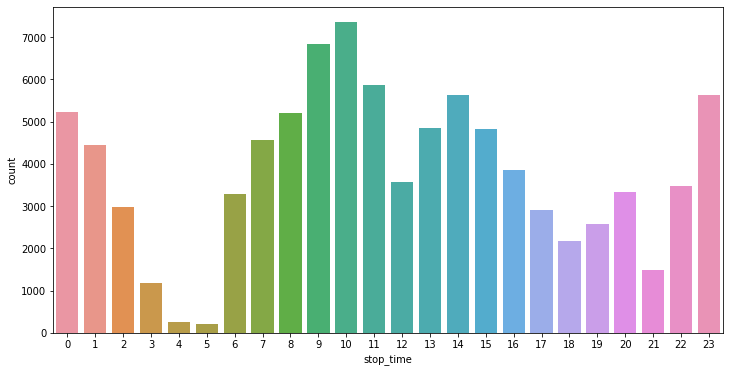

In [42]:
plt.figure(figsize= (12,6))
sns.countplot(df1.stop_time);

- As it can be clearly seen stop time is highest between 7.00 am and 11.00 am. Which can mean, while people are trying to get reach their work or their school they might be getting stopped because of speeding. 
- The lowesr rate is between 3.00 am and 5.00 am which is pretty normal because many people are asleep at that time.

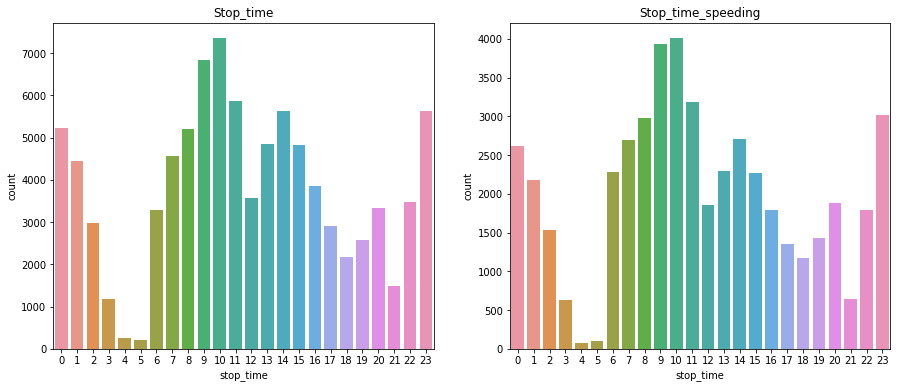

In [43]:
plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
sns.countplot(df1.stop_time)
plt.title('Stop_time')
plt.subplot(1,2,2)
sns.countplot(df1[df1.violation == 'Speeding'].stop_time)
plt.title('Stop_time_speeding');

- Our prediction was correct many of stop reason in certain hours because of speeding.

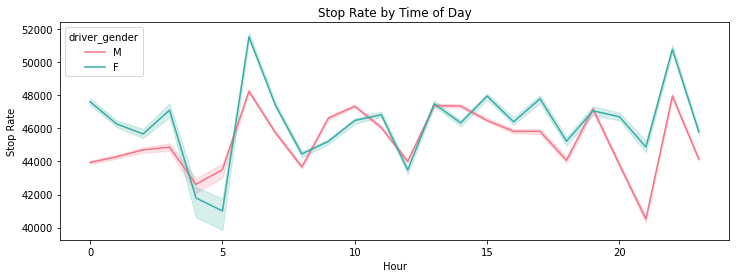

In [235]:
plt.figure(figsize=(12,4))
sns.lineplot(df1.stop_time,df1.stop_time.index, ci = 20, hue = df1.driver_gender, dashes = True , palette = 'husl' )
plt.xlabel("Hour")
plt.ylabel("Stop Rate")
plt.title("Stop Rate by Time of Day");

<br>

##  Gender

<br>

In [44]:
df1.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

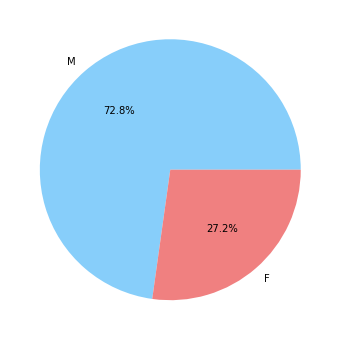

In [206]:
plt.figure(figsize = (15,6))
plt.pie(df1.driver_gender.value_counts(), 
        labels =df1.driver_gender.value_counts().index, 
        colors = ['lightskyblue', 'lightcoral'],
       autopct='%.1f%%');

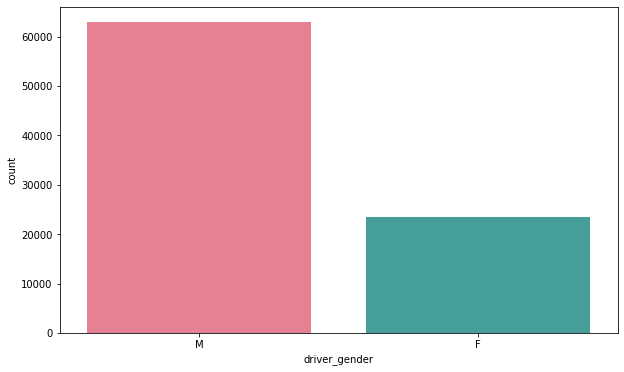

In [234]:
plt.figure(figsize = (10,6))
sns.countplot(df1.driver_gender, palette = 'husl');

- The ratio of traffic stops by gender is significantly disproportionate with males comprising the majority of cases. Can we say that means men tend to disobeying traffic rules more than women do?

Let's create 2 dataframes that are splitted by gender

In [85]:
female = df1[df1.driver_gender == 'F']
male = df1[df1.driver_gender == 'M']

<br>

## Driver Age

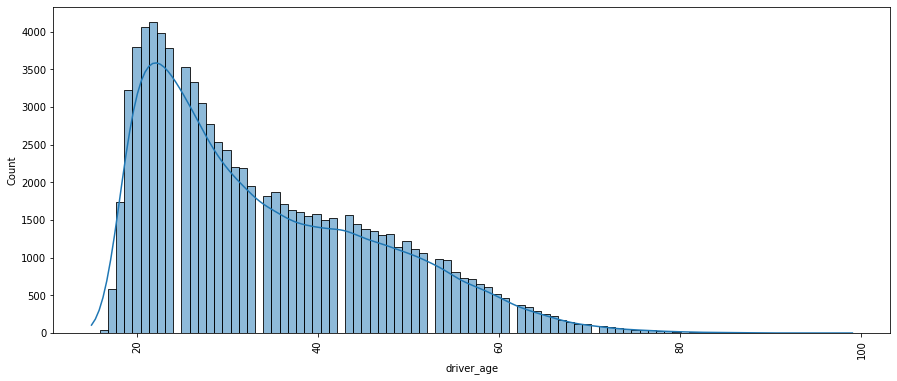

In [139]:
plt.figure(figsize = (15,6))
sns.histplot(df1.driver_age, kde = True)
plt.xticks(rotation=90);

- This is not something which made me surprise. Great majority of people who got pulled over consist of young people.

#### Driver Age - Female

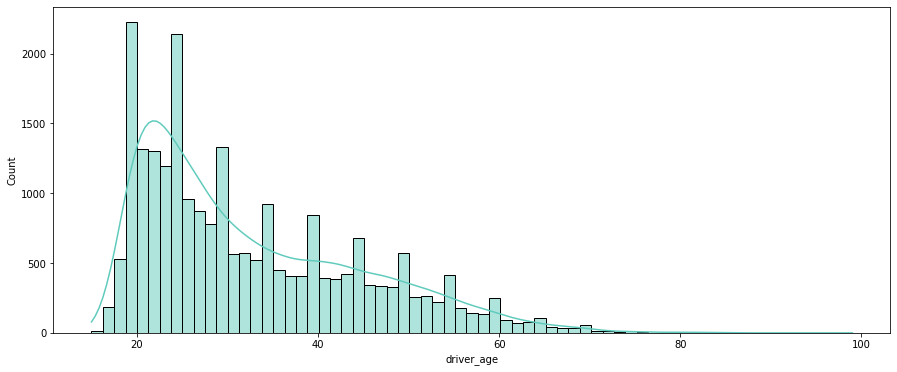

In [140]:
plt.figure(figsize = (15,6))
sns.histplot(female.driver_age, color = '#60CBBC', kde = True);

- This is a puzzling result. According to this data on the age of 20 and 25 female drivers tend to get much more pulled over compared to other ages. 

#### Driver Age - Male

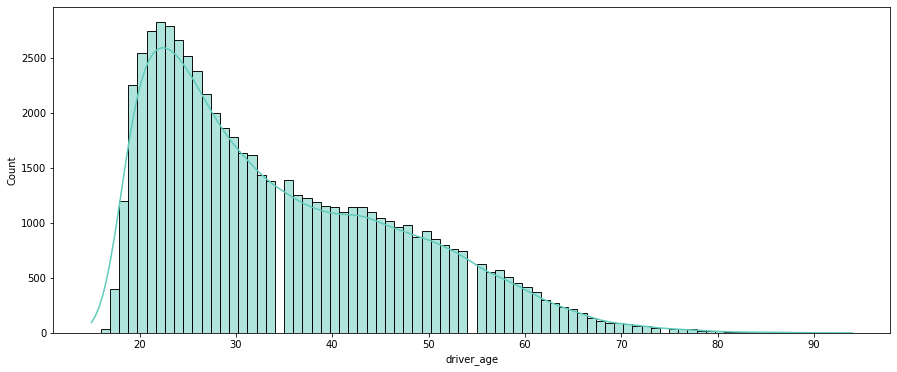

In [141]:
plt.figure(figsize = (15,6))
sns.histplot(male.driver_age, color = '#60CBBC', kde = True);

- Unless the result we got from female drivers, male drivers are consistent with overall results. 

<br>

## Violation

In [47]:
df1.violation.value_counts()

Speeding                          48463
Moving violation                  16224
Equipment/Inspection Violation    11020
Registration Violation             3432
Seatbelt Violation                 2952
Special Detail/Directed Patrol     2455
Call for Service                   1298
Other                               564
Name: violation, dtype: int64

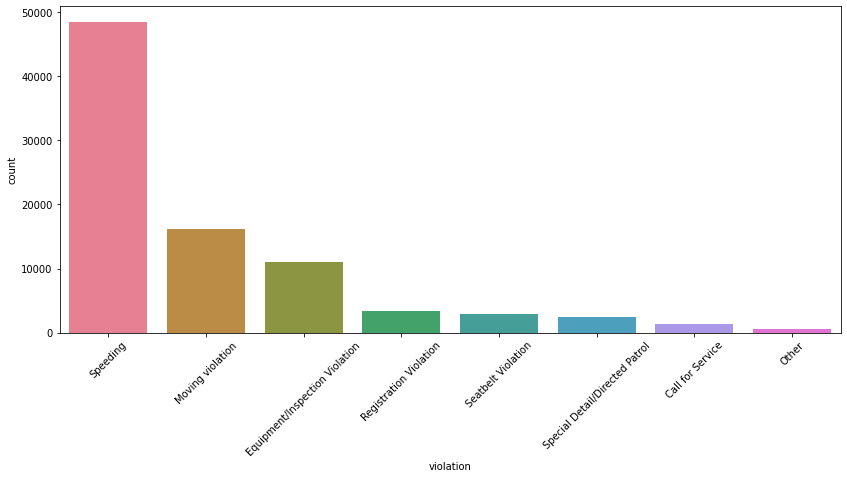

In [147]:
plt.figure(figsize = (14,6))
sns.countplot(df1.violation, order = df1.violation.value_counts().index, palette= 'husl')
plt.xticks(rotation=45);

  - Do you think that there is positive discrimination for the female drivers in terms of violation? Let's get it down.

### Violation by Gender

#### Female Violation

In [123]:
f_order = female.violation.value_counts().index

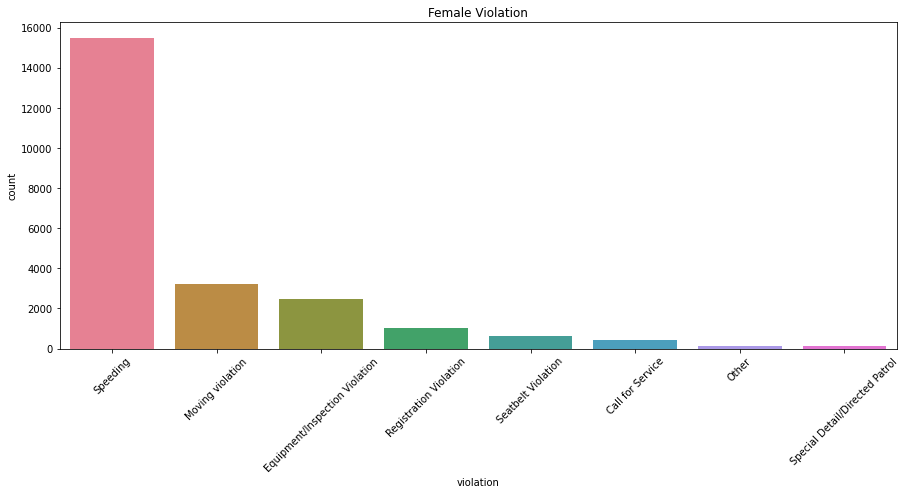

In [124]:
plt.figure(figsize = (15,6))
sns.countplot(female.violation, palette= 'husl', order = f_order)
plt.xticks(rotation=45)
plt.title('Female Violation');

#### Male Violation

In [127]:
m_order = male.violation.value_counts().index

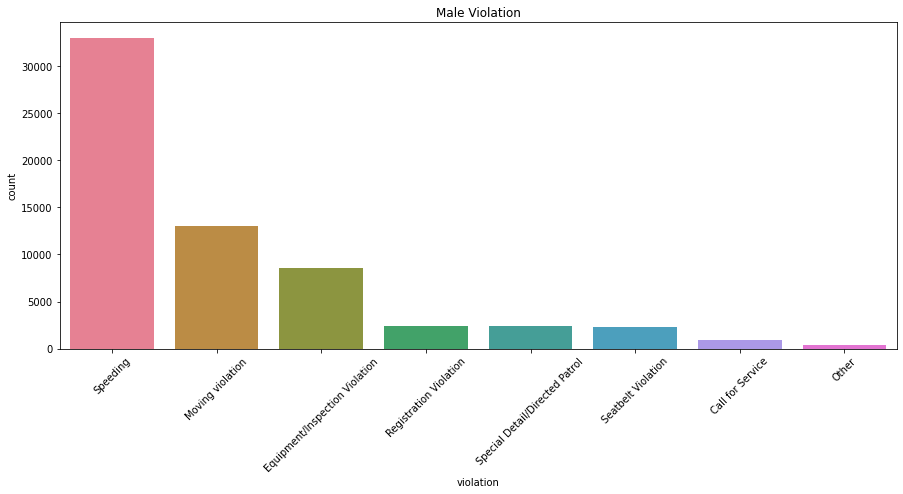

In [128]:
plt.figure(figsize = (15,6))
sns.countplot(male.violation, palette= 'husl', order = m_order)
plt.xticks(rotation=45)
plt.title('Male Violation');

- Just to make it easier them to compare let's get tehm in same chart!

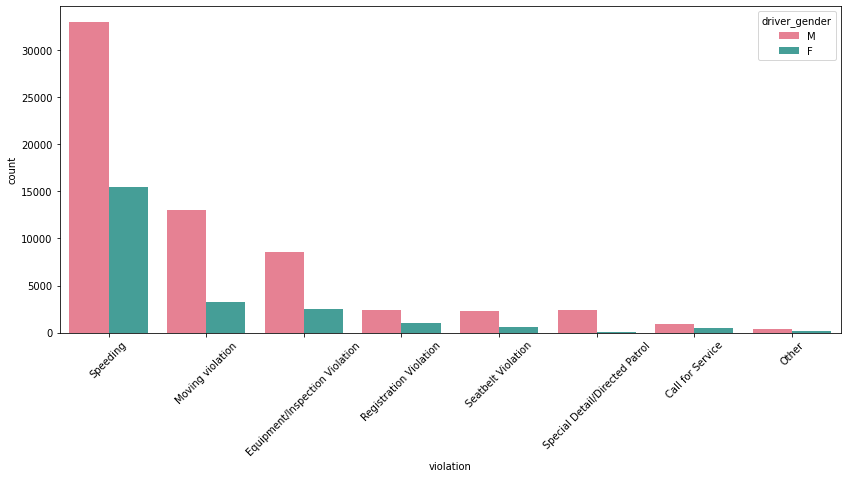

In [149]:
plt.figure(figsize = (14,6))
sns.countplot(df1.violation, order = df1.violation.value_counts().index, palette= 'husl', hue = df1.driver_gender)
plt.xticks(rotation=45);

 There is a huge difference between female and male driver in terms of violation. Probably while some will think that it is because there is a discrimination by gender, others will think it is because the ratio of following traffic rules disproportionate with females comprising the majority. :) It is your desicion to make, I am just simply giving the numbers. :)

<br>

## Search Counducted

In [150]:
df1.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [160]:
female.search_conducted.value_counts()

False    23040
True       471
Name: search_conducted, dtype: int64

In [161]:
male.search_conducted.value_counts()

False    60170
True      2725
Name: search_conducted, dtype: int64

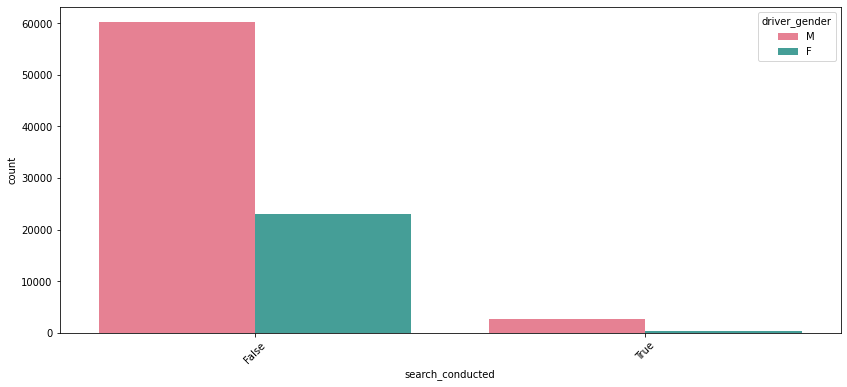

In [163]:
plt.figure(figsize = (14,6))
sns.countplot(df1.search_conducted, order = df1.search_conducted.value_counts().index, palette= 'husl', hue = df1.driver_gender)
plt.xticks(rotation=45);

- Very likely we are going to come up with the same dilemma but there is a remarkable difference between two genders.

In [164]:
df1.sample(3)

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
5355,2006-04-04,12,F,34.0,White,Speeding,False,Citation,False,0-15 Min,False
70095,2013-07-04,14,M,40.0,Black,Speeding,False,Citation,False,16-30 Min,False
37822,2009-10-11,16,M,27.0,White,Registration Violation,True,Citation,False,0-15 Min,False


In [173]:
print("\n",'The percentage of stop reasons which caused search conducted : ', flush = True)
round(df1[df1.search_conducted == True].violation.value_counts(normalize = True),2)


 The percentage of stop reasons which caused search conducted : 


Speeding                          0.30
Moving violation                  0.28
Equipment/Inspection Violation    0.22
Registration Violation            0.10
Call for Service                  0.03
Seatbelt Violation                0.03
Other                             0.02
Special Detail/Directed Patrol    0.01
Name: violation, dtype: float64

<br>

## Stop Outcome

In [174]:
df1.stop_outcome.value_counts()

Citation            77006
Warning              5294
Arrest Driver        2571
N/D                   590
No Action             589
Arrest Passenger      358
Name: stop_outcome, dtype: int64

In [175]:
female.stop_outcome.value_counts()

Citation            21088
Warning              1514
Arrest Driver         468
No Action             186
Arrest Passenger      128
N/D                   127
Name: stop_outcome, dtype: int64

In [176]:
male.stop_outcome.value_counts()

Citation            55917
Warning              3779
Arrest Driver        2103
N/D                   463
No Action             403
Arrest Passenger      230
Name: stop_outcome, dtype: int64

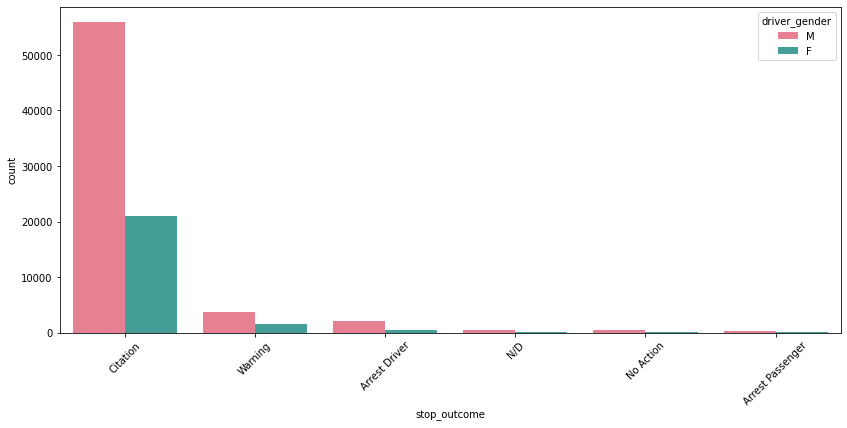

In [177]:
plt.figure(figsize = (14,6))
sns.countplot(df1.stop_outcome, order = df1.stop_outcome.value_counts().index, palette= 'husl', hue = df1.driver_gender)
plt.xticks(rotation=45);

- Regardless of the type of outcome, male drivers come up with much higher value.

In [180]:
df1[df1.stop_outcome == 'Citation'].violation.value_counts(normalize = True)

Speeding                          0.596759
Moving violation                  0.179921
Equipment/Inspection Violation    0.107641
Registration Violation            0.037478
Seatbelt Violation                0.032452
Special Detail/Directed Patrol    0.031127
Call for Service                  0.010571
Other                             0.004052
Name: violation, dtype: float64

- Almost %60 of citation consints of drivers who got pulled over because of speeding.

In [181]:
df1[df1.stop_outcome == 'Arrest Driver'].violation.value_counts(normalize = True)

Moving violation                  0.316219
Speeding                          0.226760
Equipment/Inspection Violation    0.190976
Registration Violation            0.117464
Call for Service                  0.096461
Other                             0.024893
Seatbelt Violation                0.021392
Special Detail/Directed Patrol    0.005834
Name: violation, dtype: float64

In [184]:
df1[df1.violation == 'Moving violation'].stop_outcome.value_counts(normalize = True)

Citation            0.853982
Warning             0.082840
Arrest Driver       0.050111
Arrest Passenger    0.005979
No Action           0.004684
N/D                 0.002404
Name: stop_outcome, dtype: float64

<br><br>
- As the results above demonstrates, while %30 of arrested drivers consist of moving violation, %85 of people who got stopped because of moving violation end up getting arrested.<br><br>

In [186]:
df1[df1.stop_outcome == 'Arrest Driver'].driver_gender.value_counts(normalize = True)

M    0.81797
F    0.18203
Name: driver_gender, dtype: float64

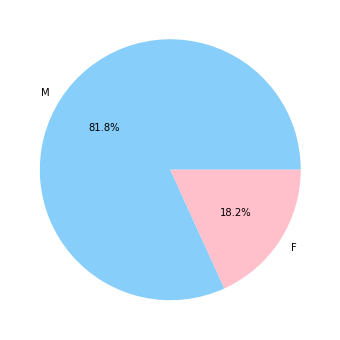

In [208]:
colors = [ 'gold', 'lightcoral']
plt.figure(figsize = (15,6))
plt.pie(df1[df1.stop_outcome == 'Arrest Driver'].driver_gender.value_counts(), 
        labels =df1[df1.stop_outcome == 'Arrest Driver'].driver_gender.value_counts().index, 
        colors = ['lightskyblue', 'pink'],
       autopct='%.1f%%');

- %82 of arrested drivers are male drivers while only %18 is female .

<br>

## Stop Duration

In [209]:
df1.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [210]:
female.stop_duration.value_counts()

0-15 Min     19724
16-30 Min     3390
30+ Min        396
1                1
Name: stop_duration, dtype: int64

In [211]:
male.stop_duration.value_counts()

0-15 Min     49817
16-30 Min    10245
30+ Min       2832
2                1
Name: stop_duration, dtype: int64

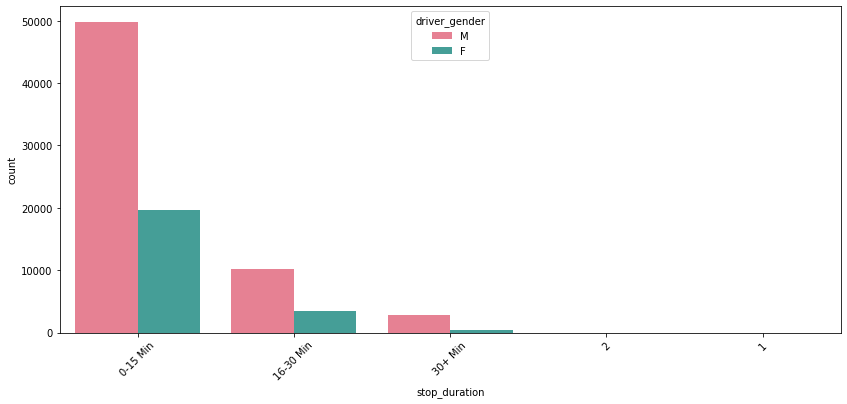

In [212]:
plt.figure(figsize = (14,6))
sns.countplot(df1.stop_duration, order = df1.stop_duration.value_counts().index, palette= 'husl', hue = df1.driver_gender)
plt.xticks(rotation=45);

<br>

## Drug Related Stop

In [238]:
df1.drugs_related_stop.value_counts(normalize = True)

False    0.991116
True     0.008884
Name: drugs_related_stop, dtype: float64

In [240]:
df1[df1.drugs_related_stop == True].stop_outcome.value_counts()

Citation            551
Arrest Driver       170
Arrest Passenger     41
Warning              33
No Action            13
N/D                   7
Name: stop_outcome, dtype: int64

- This is so weird because even though many of drug related stops got arrested or got citation some of them only got warning even some got no action. Driving while  impaired by drug is illegal and it is highly dangerous for both the driver in-question and the other drivers. In my point of view the police officers shouldn't have let them go, like nothing happened.

In [246]:
df1[df1.drugs_related_stop == True].stop_outcome.value_counts(normalize = True)

Citation            0.676074
Arrest Driver       0.208589
Arrest Passenger    0.050307
Warning             0.040491
No Action           0.015951
N/D                 0.008589
Name: stop_outcome, dtype: float64

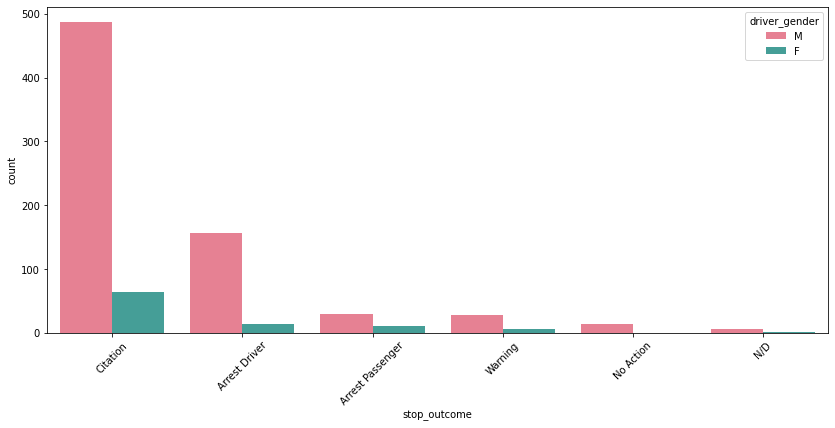

In [244]:
plt.figure(figsize = (14,6))
sns.countplot(df1[df1.drugs_related_stop == True].stop_outcome, order = df1[df1.drugs_related_stop == True].stop_outcome.value_counts().index, palette= 'husl', hue = df1.driver_gender)
plt.xticks(rotation=45);

In [248]:
female[female.drugs_related_stop == True].stop_outcome.value_counts()

Citation            64
Arrest Driver       14
Arrest Passenger    11
Warning              6
N/D                  1
Name: stop_outcome, dtype: int64

In [250]:
male[male.drugs_related_stop == True].stop_outcome.value_counts()

Citation            487
Arrest Driver       156
Arrest Passenger     30
Warning              27
No Action            13
N/D                   6
Name: stop_outcome, dtype: int64

<br>

Here is the end of my study. I have learned and enjoyed a lot while studying it. I hope you feel the same way! 
<br><br>Thank you for coming through all the way to the end ! 
<br><br>Please let me know about your thoughts!

---